<a href="https://colab.research.google.com/github/jerome-05/jerome-05/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/supermarket_sales.csv")

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.drop('Date', inplace=True, axis=1)

In [ ]:
df.drop('Time', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [ ]:
df.shape

(1000, 15)

In [ ]:
df_corr = df.corr()
df_corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


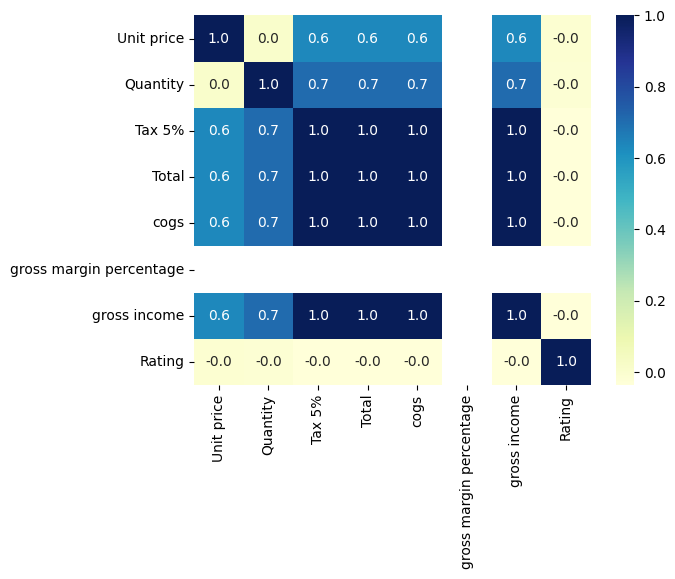

In [ ]:
df_cor =sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

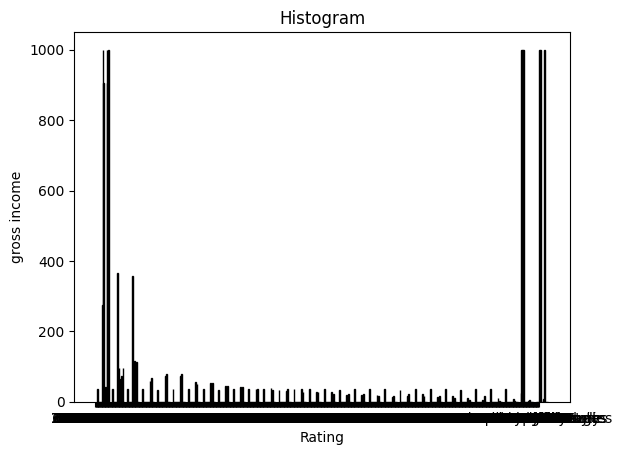

In [ ]:
plt.hist(df, bins=30, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('gross income')
plt.title('Histogram')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Branch']=le.fit_transform(df['Branch'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [ ]:

from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Customer type']=le.fit_transform(df['Customer type'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Product line']=le.fit_transform(df['Product line'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Payment']=le.fit_transform(df['Payment'])

In [ ]:

from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Branch']=le.fit_transform(df['Branch'])

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Invoice ID']=le.fit_transform(df['Invoice ID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   int64  
 1   Branch                   1000 non-null   int64  
 2   City                     1000 non-null   int64  
 3   Customer type            1000 non-null   int64  
 4   Gender                   1000 non-null   int64  
 5   Product line             1000 non-null   int64  
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Payment                  1000 non-null   int64  
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
X=df.drop(columns=['gross income']).values
Y=df['gross income'].values

In [ ]:
X.shape

(1000, 14)

In [ ]:
Y.shape

(1000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)o

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)
print(Y_pred.reshape(len(Y_pred),1))
regressor.intercept_
regressor.coef_

[[ 8.745 ]
 [21.4335]
 [12.002 ]
 [ 6.663 ]
 [11.0115]
 [12.9185]
 [ 8.767 ]
 [ 1.5885]
 [14.0805]
 [ 8.6   ]
 [ 6.322 ]
 [12.498 ]
 [ 2.54  ]
 [ 4.4845]
 [12.854 ]
 [34.392 ]
 [42.305 ]
 [15.228 ]
 [35.69  ]
 [ 9.0045]
 [35.1315]
 [16.4   ]
 [23.979 ]
 [ 6.933 ]
 [10.326 ]
 [ 9.0705]
 [18.792 ]
 [17.478 ]
 [38.6   ]
 [ 3.82  ]
 [10.3065]
 [24.186 ]
 [33.725 ]
 [ 2.3205]
 [11.306 ]
 [28.42  ]
 [13.806 ]
 [23.094 ]
 [10.3455]
 [37.3   ]
 [ 8.137 ]
 [48.69  ]
 [33.235 ]
 [31.311 ]
 [17.595 ]
 [17.604 ]
 [11.79  ]
 [45.25  ]
 [ 3.162 ]
 [10.765 ]
 [ 4.935 ]
 [12.98  ]
 [ 7.66  ]
 [ 7.038 ]
 [ 5.076 ]
 [ 9.298 ]
 [ 9.693 ]
 [16.8575]
 [24.8   ]
 [ 8.814 ]
 [25.893 ]
 [29.008 ]
 [34.3   ]
 [21.4935]
 [ 3.876 ]
 [ 4.37  ]
 [ 2.7225]
 [34.672 ]
 [ 1.439 ]
 [12.06  ]
 [36.624 ]
 [ 4.4305]
 [19.4635]
 [ 4.485 ]
 [ 4.4155]
 [ 5.2425]
 [ 6.377 ]
 [ 3.0435]
 [ 3.2495]
 [12.036 ]
 [ 3.29  ]
 [34.83  ]
 [14.031 ]
 [43.866 ]
 [24.505 ]
 [25.683 ]
 [ 4.3525]
 [ 1.595 ]
 [27.072 ]
 [ 4.658 ]
 [15.9025]

array([-1.68772379e-18,  5.10702591e-15, -3.65918233e-17, -8.89540449e-16,
        7.19520607e-16, -3.42662097e-16,  1.70870262e-16,  1.23303603e-15,
        1.52928903e-03, -3.02840401e-03,  4.69899998e-17,  5.31033598e-02,
       -9.51638570e-03,  2.02745806e-16])

In [ ]:
X_train.shape

(666, 14)

In [ ]:
Y_train.shape

(666,)

<Axes: >

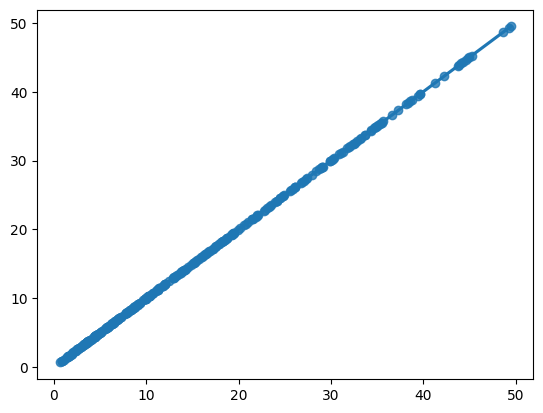

In [ ]:
sns.regplot(x=Y_test,y=Y_pred)
#plt.plot(X_train, regressor.predict(X_train), color = "red")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MULTIPLE REGRESSION

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2_linear = r2_score(Y_test, Y_pred)

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.40401524842592446
Mean Squared Error: 0.30824593108382436
Root Mean Squared Error: 0.555199001335399
R-squared: 1.0


POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

# Make predictions on the training set
Y_train_pred = lin_reg.predict(X_train_poly)

# Make predictions on the test set
Y_test_pred = lin_reg.predict(X_test_poly)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_poly = r2_score(Y_test, Y_pred)
print(r2_poly)

0.9977601777219717


RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
# Standardize features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Ridge regression
alpha = 1.0  # Regularization parameter, you can adjust this
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_poly_scaled, Y_train)

# Make predictions on the training set
Y_train_pred = ridge_reg.predict(X_train_poly_scaled)

# Make predictions on the test set
Y_pred = ridge_reg.predict(X_test_poly_scaled)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_ridge = r2_score(Y_test, Y_pred)
print(r2_ridge)

0.9999096629177835


LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
# Standardize features
#scaler = StandardScaler()
#X_train_poly_scaled = scaler.fit_transform(X_train_poly)
#X_test_poly_scaled = scaler.transform(X_test_poly)

# Lasso regression
alpha = 0.1  # Regularization parameter, you can adjust this
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train_poly_scaled, Y_train)

# Make predictions on the training set
Y_train_pred = lasso_reg.predict(X_train_poly_scaled)

# Make predictions on the test set
Y_test_pred = lasso_reg.predict(X_test_poly_scaled)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_lasso = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)
print(r2_lasso)

0.9999261542642051


KNN REGRESSION

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# KNN regression
k_value = 5  # Number of neighbors, you can adjust this
knn_reg = KNeighborsRegressor(n_neighbors=k_value)
knn_reg.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_pred = knn_reg.predict(X_train)

# Make predictions on the test set
Y_pred = knn_reg.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_knn= r2_score(Y_test, Y_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R-squared (Test): {r2_knn}')


Training RMSE: 0.5057733583929268
Test RMSE: 0.0
R-squared (Test): 0.9977601777219717


In [ ]:
import pandas as pd

# Define the models and their respective R^2 scores
models = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", "KNN Regression"]
r2_scores = [r2_linear, r2_poly, r2_ridge, r2_lasso, r2_knn]

# Create a DataFrame
results_df = pd.DataFrame({"Model": models, "R^2 Score": r2_scores})

# Print the DataFrame
print(results_df)


                   Model  R^2 Score
0      Linear Regression   0.997760
1  Polynomial Regression   0.997760
2       Ridge Regression   0.999910
3       Lasso Regression   0.999926
4         KNN Regression   0.997760


In conclusion we can say that the LASSO REGRESSION model has the highest accuracy of all.
The r2_score of LASSO REGRESSION IS 0.999926

HYPER PARAMETER TUNING USING GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rg = RandomForestRegressor(random_state=42)

In [ ]:
# Define a parameter grid to search over
param_grid = {'n_estimators':[10, 20, 30],'max_features':['sqrt', 'log2'],'max_depth':[4, 6, 8, 10],'criterion':['squared_error', 'absolute_error']}

In [ ]:
# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rg,param_grid=param_grid, cv=5,scoring='neg_mean_absolute_error',verbose=1, n_jobs=-1)

In [ ]:
error_score = 'raise'

In [ ]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
# Setup GridSearchCV for hyperparameter tuning with error handling
grid_search = GridSearchCV(estimator=rg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1, error_score='raise')

# Fit GridSearchCV to the training data
try:
    grid_search.fit(X_train, Y_train)
except Exception as e:
    print("Error occurred during grid search:", e)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# Print the best parameters found by GridSearchCV
print("Best parameters found: ",
grid_search.best_params_)

Best parameters found:  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}


In [ ]:
# Use the best estimator to make predictions on the test set
Y_pred =grid_search.best_estimator_.predict(X_test)

In [ ]:
# Calculate performance metrics
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

In [ ]:
print("r2:",r2)
print("mae:",mae)
print("mse:",mse)

r2: 0.9986428330266597
mae: 0.2823783541076078
mse: 0.18677428179782657


In [ ]:
#random forest regressor with n_estimators=10 (default)
rgr = RandomForestRegressor(random_state=43)
rgr = rgr.fit(X_train,Y_train)
r2 = r2_score(Y_test,rgr.predict(X_test))
print('r2 score after hyper-paramter tunning is: ',r2)

r2 score after hyper-paramter tunning is:  0.9998849644125279


FEATURE SELECTION USING K BEST ,F REGRESSION

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_train is your feature matrix and y_train is your target vector
select_feature = SelectKBest(f_regression, k=5).fit(X_train, Y_train)

In [ ]:
# Get the scores and selected features
feature_scores = select_feature.scores_
selected_features_indices = select_feature.get_support(indices=True)
selected_features = X_train[selected_features_indices]

In [ ]:
# Print the scores and selected features
print('Score list:', feature_scores)
print('Selected feature list:', selected_features)

Score list: [ 2.34329762e+00  1.32822213e+00  2.86918262e-01  1.72889680e-01
  5.45245360e+00  3.22706338e-01  4.30225523e+02  6.60671843e+02
 -4.98398359e+17 -1.49519508e+17  4.98601409e-01 -7.47597538e+17
  0.00000000e+00  4.88838135e-01]
Selected feature list: [[639.           1.           0.           0.           0.
    1.          17.87         4.           3.574       75.054
    2.          71.48         4.76190476   6.5       ]
 [438.           2.           1.           0.           1.
    2.          17.44         5.           4.36        91.56
    0.          87.2          4.76190476   8.1       ]
 [334.           2.           1.           1.           0.
    1.          23.82         5.           5.955      125.055
    2.         119.1          4.76190476   5.4       ]
 [583.           1.           0.           0.           0.
    2.          62.85         4.          12.57       263.97
    2.         251.4          4.76190476   8.7       ]
 [619.           2.           1.  

In [ ]:
rf_r= RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the training data
rf_r.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importances
feature_importances = rf_r.feature_importances_

In [ ]:
# Print feature importances

for feature, importance in zip(X, feature_importances):

    print(f"{feature}:{importance}")

[814.           0.           2.           0.           0.
   3.          74.69         7.          26.1415     548.9715
   2.         522.83         4.76190476   9.1       ]:2.2829655632456977e-05
[142.           2.           1.           1.           0.
   0.          15.28         5.           3.82        80.22
   0.          76.4          4.76190476   9.6       ]:4.885740624241776e-06
[653.           0.           2.           1.           1.
   4.          46.33         7.          16.2155     340.5255
   1.         324.31         4.76190476   7.4       ]:4.175494229370013e-06
[ 18.           0.           2.           0.           1.
   3.          58.22         8.          23.288      489.048
   2.         465.76         4.76190476   8.4       ]:3.6703284564564577e-06
[339.           0.           2.           1.           1.
   5.          86.31         7.          30.2085     634.3785
   2.         604.17         4.76190476   5.3       ]:3.326772884355868e-06
[733.           2.   

In [ ]:
# Make predictions on the test set
Y_pred = rf_r.predict(X_test)

In [ ]:
# Evaluate the model

r2 = r2_score(Y_test, Y_pred)

print(f"\nr2 _score after feature selection techniques : {r2}")


r2 _score after feature selection techniques : 0.9977601777219717


In [ ]:
# Fit GridSearchCV to the training data
try:
    SelectKBest(chi2, k=10).fit(X_train, Y_train)
except Exception as e:
    print("Error occurred during grid search:", e)


Error occurred during grid search: name 'chi2' is not defined


AUTO - SPLIT

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
from tabulate import tabulate

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def performance(x_train, x_test, y_train, y_test, regressor):
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  return r2, mse, mae

def op_ratio(x,y,regs,splitting_ratios):
  optimal_ratio = None
  max_r2 = 0.0
  header = ["Test Ratio", "regressor", "r2", "mse", "mae"]
  table_data = []
  for test_ratio in splitting_ratios:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=42)
    for regressor_name, regressor in regs.items():
      r2, mse, mae = performance(x_train, x_test, y_train, y_test, regressor)
      row_data = [f"{test_ratio:.2f}", regressor_name,
                  f"{r2:.4f}", f"{mse:.4f}",
                  f"{mae:.4f}"]
      table_data.append(row_data)
      if r2 > max_r2:
        max_r2 = r2
        optimal_ratio = test_ratio
  print("\nOptimal Splitting Ratio:", optimal_ratio)
  print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#define regressors
regressor= {'Random Forest': RandomForestRegressor(),
              'Gradient Boosting': GradientBoostingRegressor(),
              'Support Vector Machine': SVR(),
              'Decision Tree': DecisionTreeRegressor(),
              'KNN': KNeighborsRegressor()
              }

In [ ]:
#Define Splitting ratios to evaluate
splitting_ratios = np.linspace(0.1, 0.9,9)

In [ ]:
#Find the optimal splitting ratio
import warnings
warnings.filterwarnings("ignore")

op_ratio(X,Y,regressor,splitting_ratios)


Optimal Splitting Ratio: 0.1
+--------------+------------------------+--------+---------+--------+
|   Test Ratio | regressor              |     r2 |     mse |    mae |
+==============+========================+========+=========+========+
|          0.1 | Random Forest          | 1      |  0.0021 | 0.0288 |
+--------------+------------------------+--------+---------+--------+
|          0.1 | Gradient Boosting      | 0.9999 |  0.0105 | 0.0764 |
+--------------+------------------------+--------+---------+--------+
|          0.1 | Support Vector Machine | 0.9981 |  0.2557 | 0.2104 |
+--------------+------------------------+--------+---------+--------+
|          0.1 | Decision Tree          | 0.9999 |  0.0095 | 0.0611 |
+--------------+------------------------+--------+---------+--------+
|          0.1 | KNN                    | 0.9986 |  0.1856 | 0.3472 |
+--------------+------------------------+--------+---------+--------+
|          0.2 | Random Forest          | 1      |  0.0036 |